In [86]:
#importar librerias
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
#leer archivo csv
df=pd.read_csv('/home/kali/datascience/data/dataset_banco.csv')


In [88]:
#ver datos
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [89]:
#ver variables categoricas y numericas 
df.info()
var_cat=['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']
var_num=['age','balance','day','duration','campaign','pdays','previous']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


# 4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## 4.1 Datos faltantes

Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar 

In [90]:
#datos faltantes 
print('el numero de datos es ',df.shape)
df.dropna(inplace=True)
print('el numero de datos es ',df.shape)
df.info()

el numero de datos es  (45215, 17)
el numero de datos es  (45207, 17)
<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


## 4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los vlaores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

In [91]:
#conteo en los niveles de las diferentes columnas categoricas y numericas
for i in var_cat:
    print(f'Columna {i}: {df[i].nunique()} subniveles')


Columna job: 18 subniveles
Columna marital: 6 subniveles
Columna education: 10 subniveles
Columna default: 2 subniveles
Columna housing: 2 subniveles
Columna loan: 6 subniveles
Columna contact: 5 subniveles
Columna month: 12 subniveles
Columna poutcome: 6 subniveles
Columna y: 2 subniveles


In [92]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [93]:
#filas repetidas
print(f'el numero de filas repetidas es {df.shape}')
df.drop_duplicates(inplace=True)
print(f'el numero de filas repetidas es {df.shape}')


el numero de filas repetidas es (45207, 17)
el numero de filas repetidas es (45203, 17)


## 4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

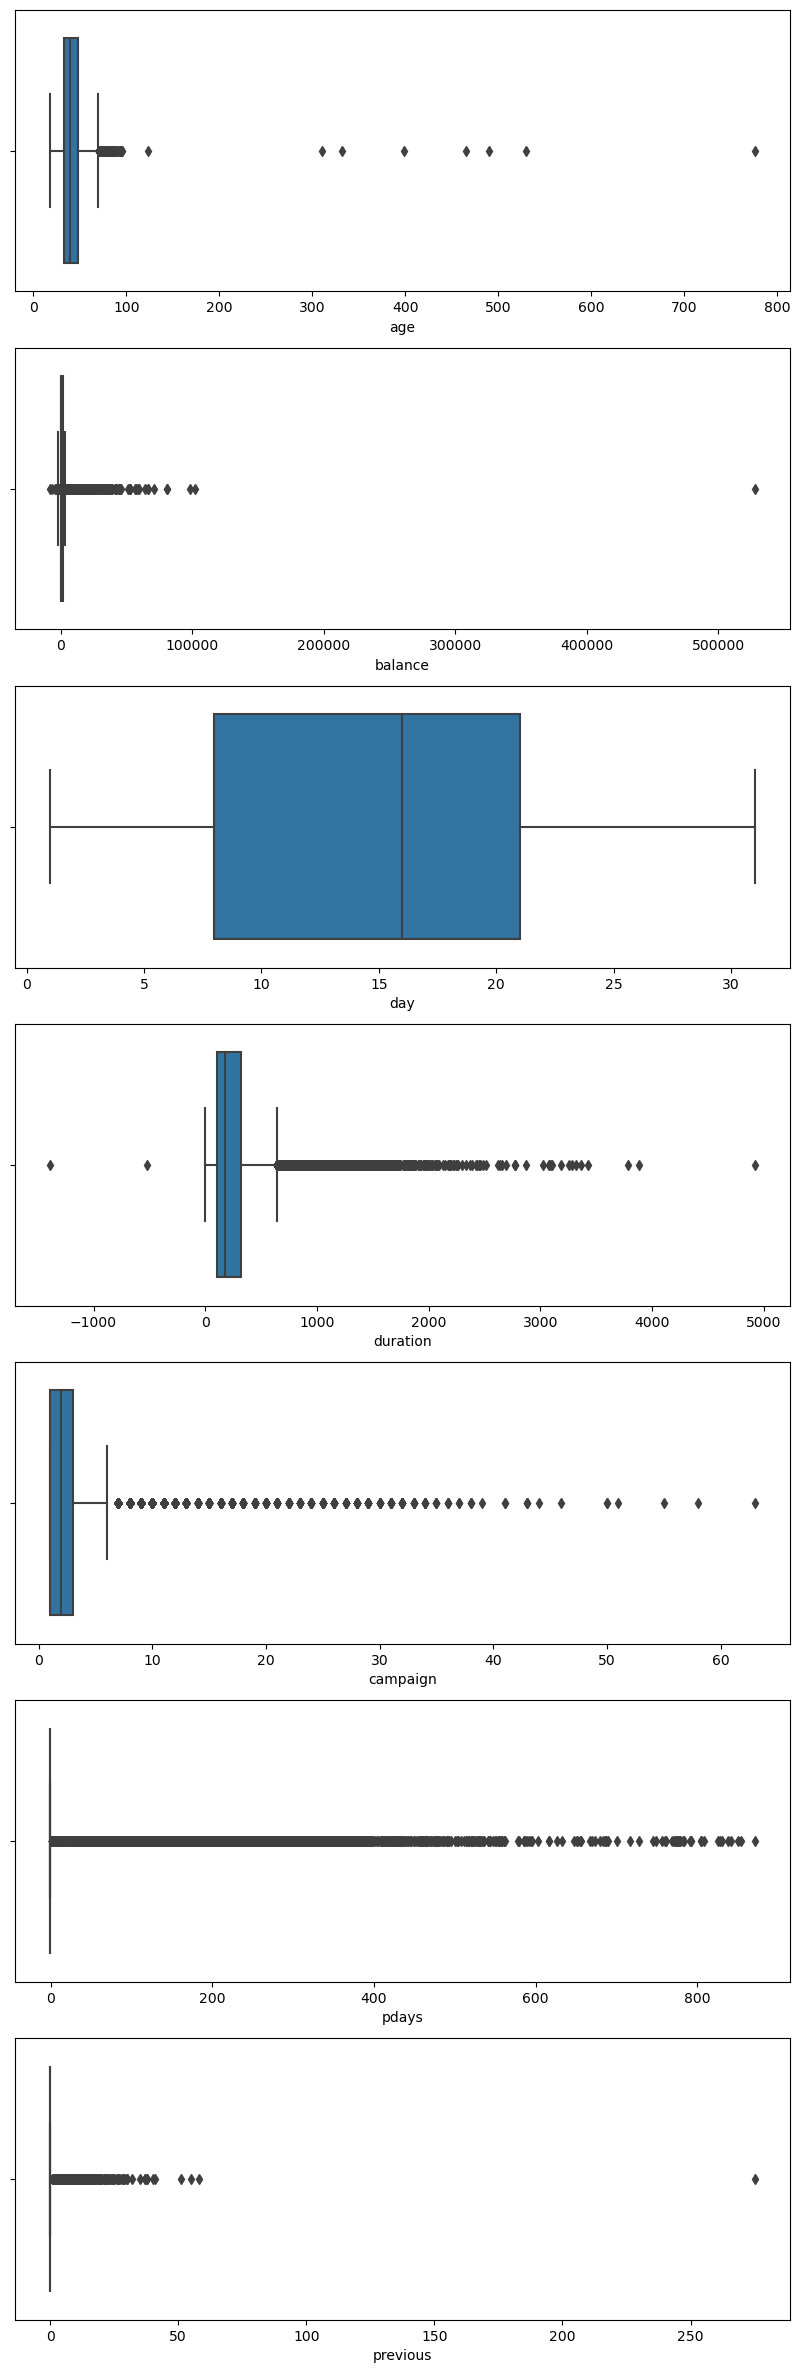

In [94]:
#generar graficas individuales pues las variables numericas
fig,ax=plt.subplots(nrows=7,ncols=1,figsize=(10,30))
#estan en rangos diferentes
for i, j in enumerate(var_num):
    sns.boxplot(x=j,data=df,ax=ax[i])


**Observaciones:**
- "age": hay sujetos con edades mucho mayores a 100 años
- "duration": hay valores negativos
- "previous": hay un valor extremadamente alto (cercano a 300)

In [95]:
#eliminar filas con 'age'>100
print(f'tamano de set antes de eliminar outliers {df.shape}')
df=df[df['age']<100]
print(f'tamano de set antes de eliminar outliers {df.shape}')

tamano de set antes de eliminar outliers (45203, 17)
tamano de set antes de eliminar outliers (45195, 17)


In [96]:
#eliminar filas con 'diration'<0
print(f'tamano de set antes de eliminar outliers {df.shape}')
df=df[df['duration']>0]
print(f'tamano de set despues de eliminar outliers {df.shape}')


tamano de set antes de eliminar outliers (45195, 17)
tamano de set despues de eliminar outliers (45190, 17)


In [97]:
#eliminar filas con 'previous'>100
print(f'tamano de set antes de eliminar outliers {df.shape}')
df=df[df['previous']<100]
print(f'tamano de set antes de eliminar outliers {df.shape}')


tamano de set antes de eliminar outliers (45190, 17)
tamano de set antes de eliminar outliers (45189, 17)


## 4.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

In [98]:
print(var_cat)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


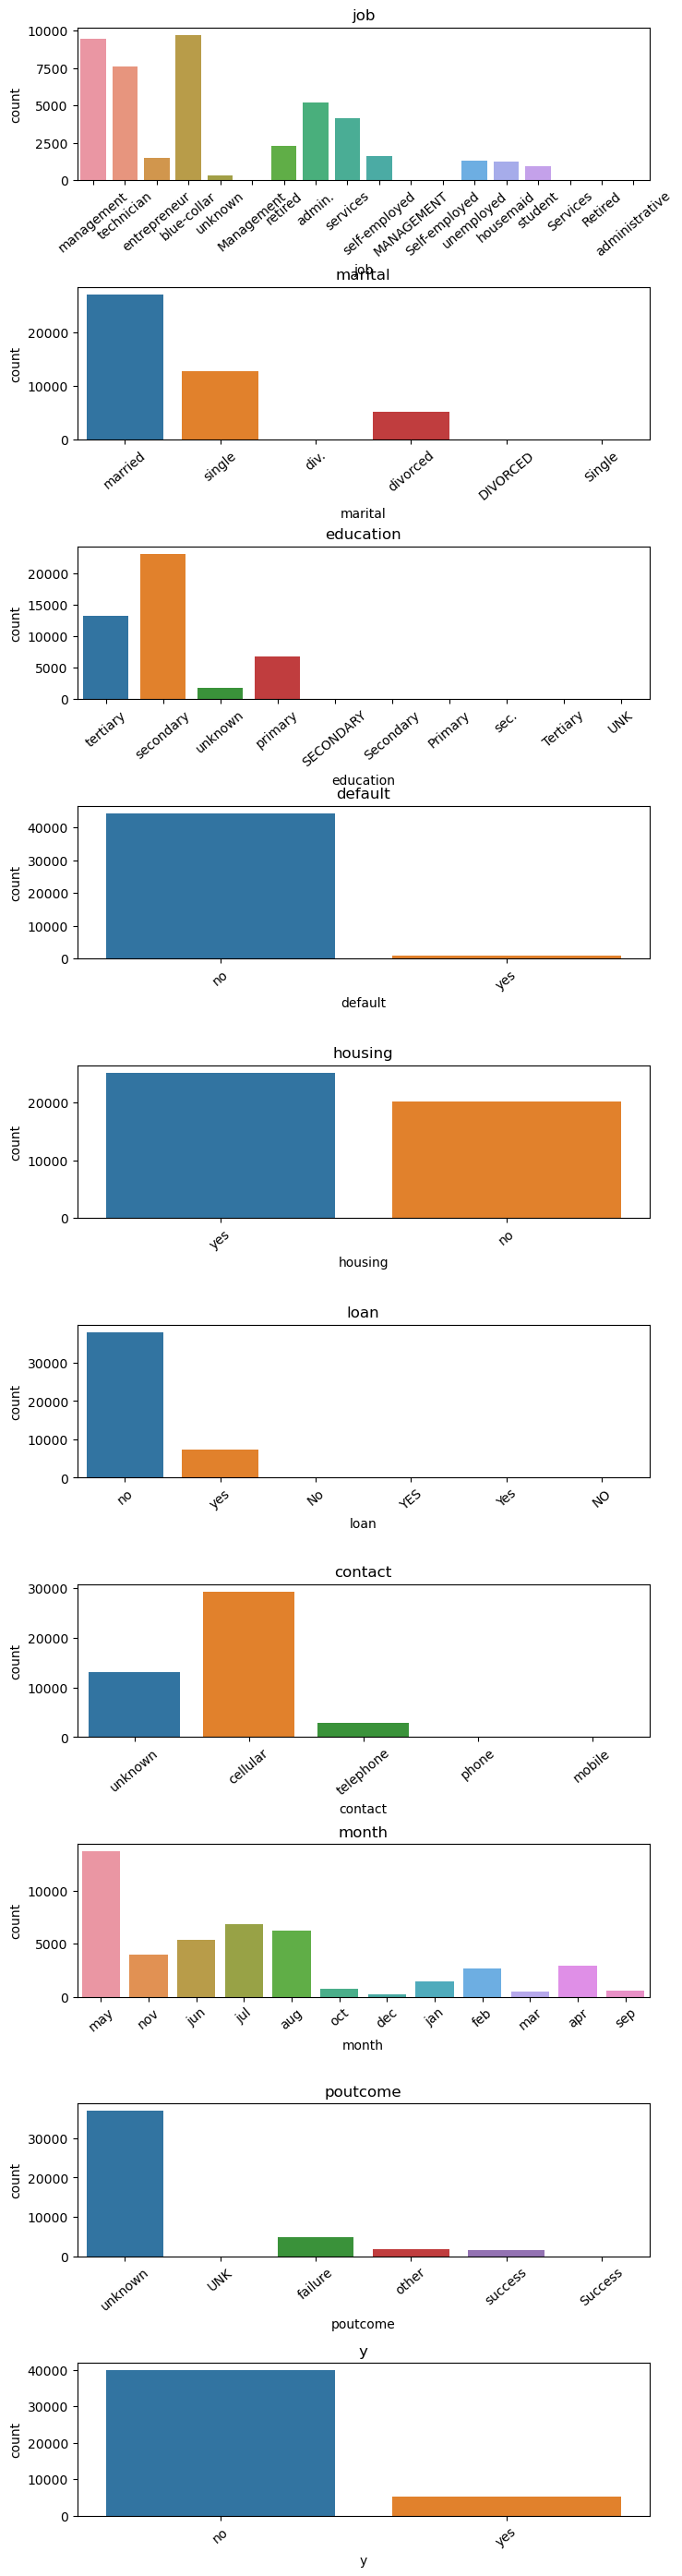

In [99]:
#graficar los subniveles de cada variables categorica 
fig,ax=plt.subplots(nrows=10,ncols=1,figsize=(8,35), gridspec_kw={'hspace':0.7})
for i,j in enumerate(var_cat):
    sns.countplot(x=j,data=df,ax=ax[i])
    ax[i].set_title(j)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=40)

Inicialmente se observa que hay sub-niveles con el mismo nombre pero escritos en minúscula, en mayúscula o con la primera letra en mayúscula.

Unifiquemos estos sub-niveles inicialmente:

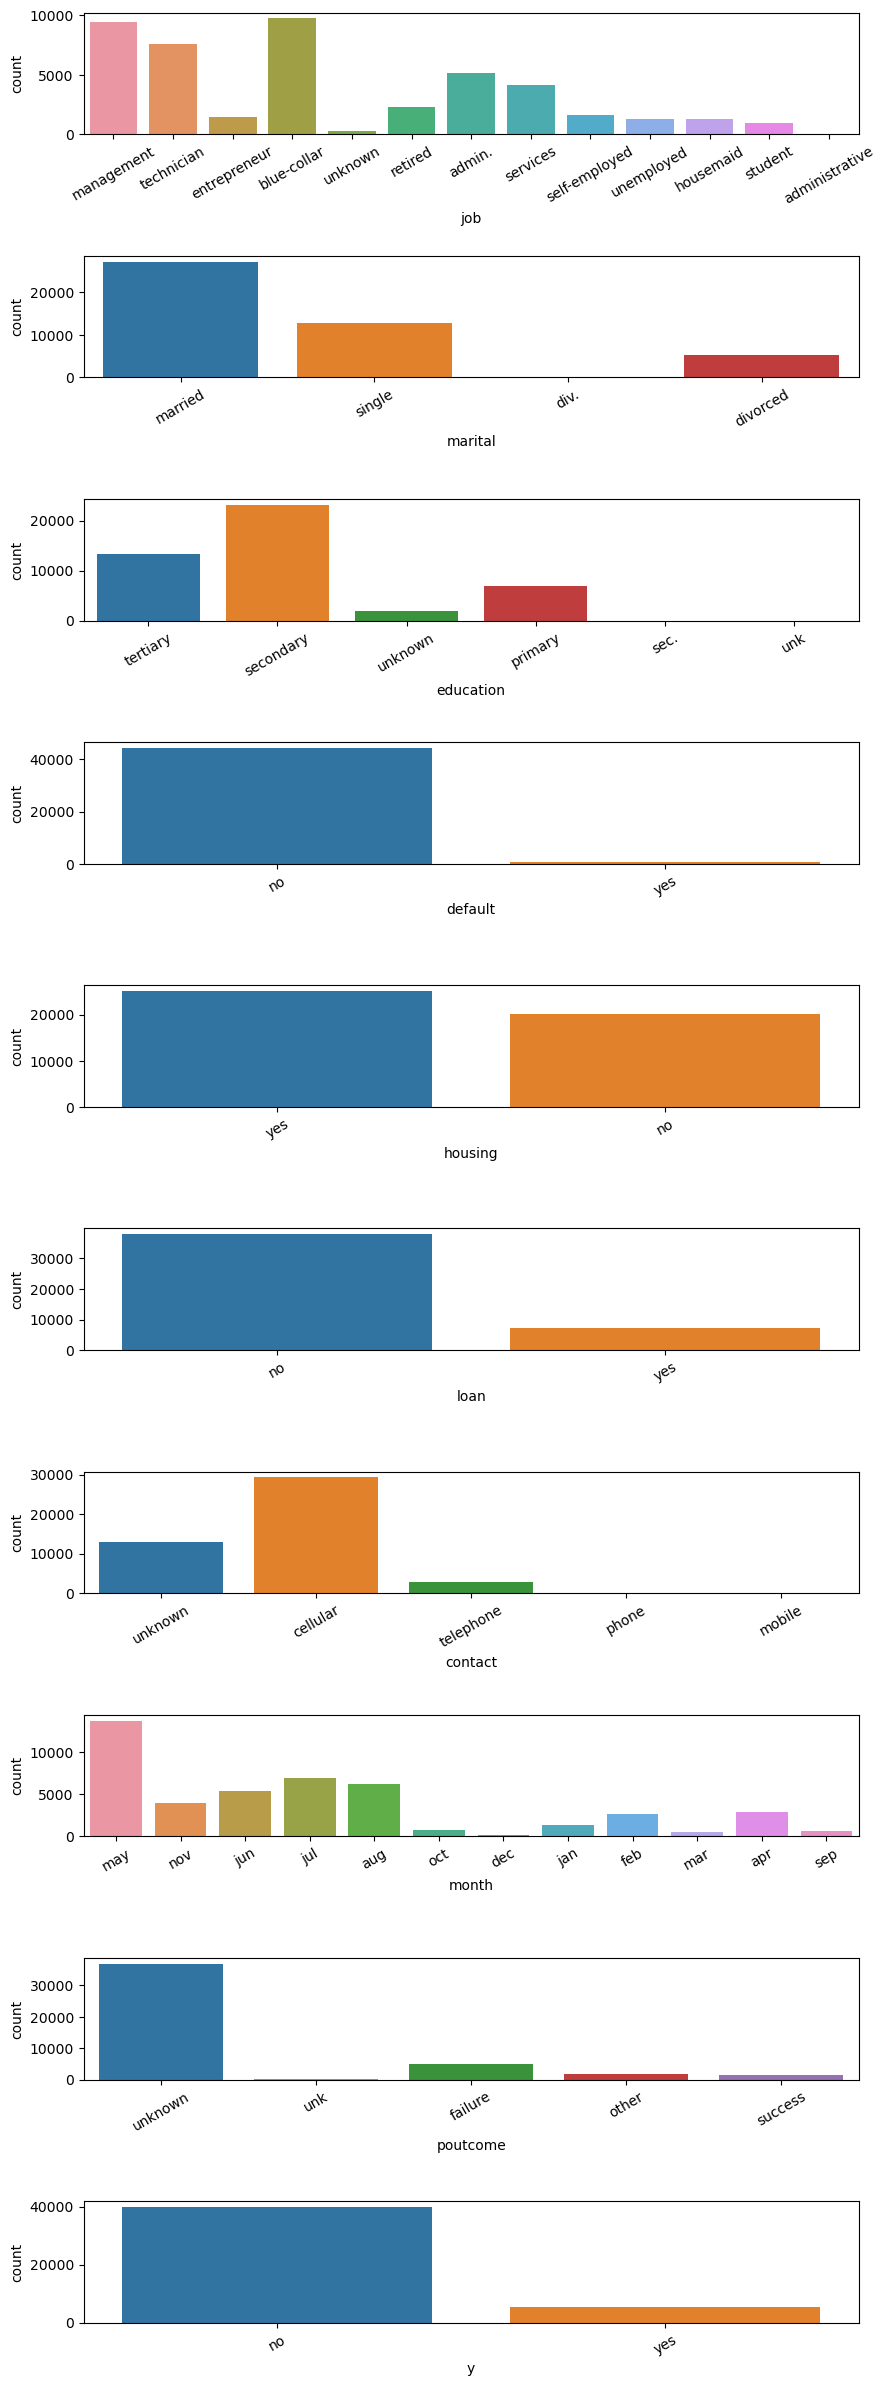

In [100]:
#representar en minusculas solo si la columna es categorica
for col in df.columns:
    if col in var_cat:
        df[col]=df[col].str.lower()

fig, ax =plt.subplots(nrows=10,ncols=1,figsize=(10,30))
fig.subplots_adjust(hspace=1)
#y generamos las graficas nuevamente
for i, j in enumerate(var_cat):
    sns.countplot(x=j,data=df,ax=ax[i])
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
    

In [101]:
#job: unificar admin. y administrative
print(df['job'].unique())
df['job']=df['job'].str.replace('admin.','administrative',regex=False)
print(df['job'].unique())


['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'administrative']
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [102]:
#marital: unificar div, y divorced 
print(df['marital'].unique())
df['marital']=df['marital'].str.replace('div','divorced',regex=False)
print(df['marital'].unique())


['married' 'single' 'div.' 'divorced']
['married' 'single' 'divorced.' 'divorcedorced']


In [105]:
#educacion: unificar sec. y secondaty, unk y unknown
print(df['education'].unique())
df['education']=df['education'].str.replace('sec.','secondary',regex=False)
print(df['education'].unique())

print(df['education'].unique())
df.loc[df['education']=='unk','education']='unknown'
print(df['education'].unique())


['tertiary' 'secondary' 'unknown' 'primary']
['tertiary' 'secondary' 'unknown' 'primary']
['tertiary' 'secondary' 'unknown' 'primary']
['tertiary' 'secondary' 'unknown' 'primary']


In [108]:
#contact: unificar telephone y phone
print(df['contact'].unique())
df.loc[df['contact']=='phone','contact']='telephone'
df.loc[df['contact']=='mobile','contact']='telephone'
df.loc[df['contact']=='cellular','contact']='telephone'

print(df['contact'].unique())


['unknown' 'cellular' 'telephone']
['unknown' 'telephone']


In [109]:
#poutcome: unificar unk y unknown
print(df['poutcome'].unique())
df.loc[df['poutcome']=='unk','poutcome']='unknown'
print(df['poutcome'].unique())


['unknown' 'unk' 'failure' 'other' 'success']
['unknown' 'failure' 'other' 'success']


Originalmente tenía 45.215 registros y 17 columnas. El dataset resultante tiene 45.189 filas (26 menos) y 17 columnas.

El set de datos ya está listo para el Análisis Exploratorio.

In [110]:
df.shape

(45189, 18)

In [112]:
ruta='/home/kali/datascience/code/cleaning/datos_finales.csv'
df.to_csv(ruta, index=False)